# Problem Statement: 

Heart Failure is biggest problem in the word into healtcare industry. So we predict possibility of heart failure on the basis
of given features using machine learning

In [1]:
#importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\\DS\\heart_failure\\Dataset\\heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

anaemia = Decrease of red blood cells or hemoglobin (boolean)

creatinine_phosphokinase = Level of the CPK enzyme in the blood (mcg/L)

diabetes = If the patient has diabetes (boolean)

ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)

high_blood_pressure = If the patient has hypertension (boolean)

platelets = Platelets in the blood (kiloplatelets/mL)

serum_creatinine = Level of serum creatinine in the blood (mg/dL)

serum_sodium = Level of serum sodium in the blood (mEq/L)

sex = Woman =0 or man = 1 (binary)

smoking = If the patient smokes = 1 or not smokes = 0 (boolean)

time = Follow-up period (days)

DEATH_EVENT = If the patient deceased during the follow-up period (boolean) This is our target variable

In [4]:
#checking any null value present in dataset
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Exploratory Data Analysis

In [6]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

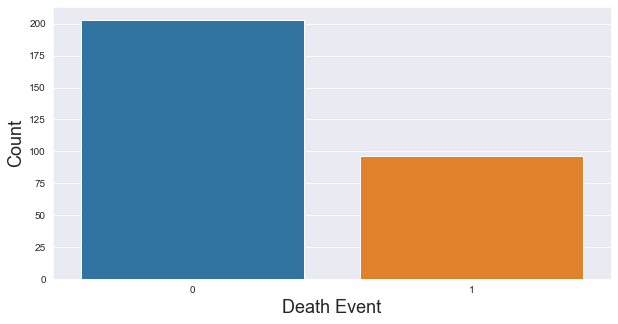

In [7]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(df['DEATH_EVENT'])
plt.xlabel('Death Event',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.show()

Count plot shows that out of 299 people 96 people died becuause of heart failure 

# Effect of Age on Heart Failure

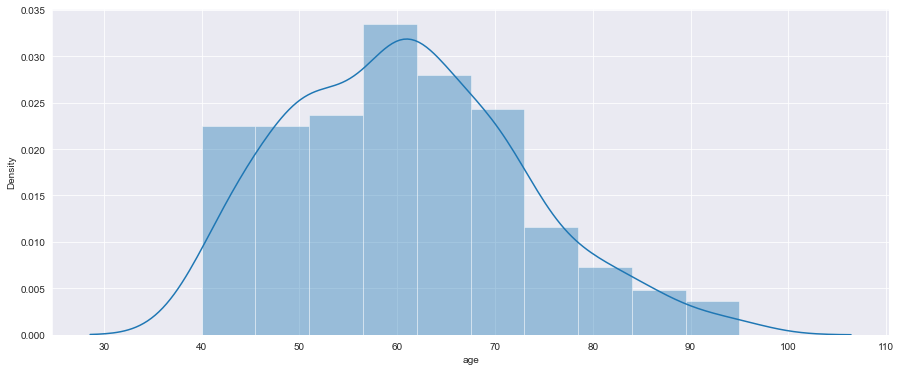

In [8]:
#Checking Data Distribution for Age
plt.figure(figsize=(15,6))
sns.distplot(df['age'])
plt.show()

The Age is normally distributed

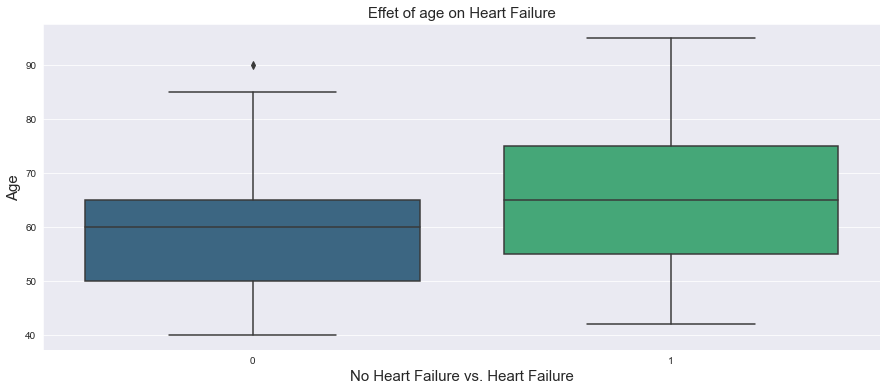

In [9]:
plt.figure(figsize=(15,6))
sns.boxplot(x='DEATH_EVENT',y='age',data=df,palette='viridis')
plt.title('Effet of age on Heart Failure',size=15)
plt.xlabel('No Heart Failure vs. Heart Failure',size=15)
plt.ylabel('Age',size=15);

The above Boxplot shows.

Median Age of patients with heart failure is higher. 60-70 years of age is the most crucial year in terms of heart failure.

# Effect of Diabeties on Heart Failure

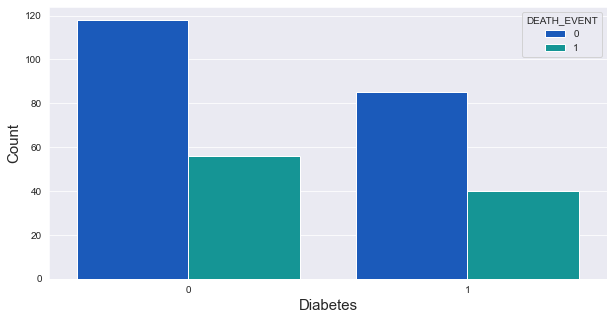

In [10]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(x='diabetes', data=df, hue ='DEATH_EVENT', palette='winter')
plt.xlabel('Diabetes',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

The person who have diabetes out of almost 50% people died

# Effect of Ejection Fraction

In [11]:
#Checking unique values in ejection fraction
df.ejection_fraction.unique()  

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70],
      dtype=int64)

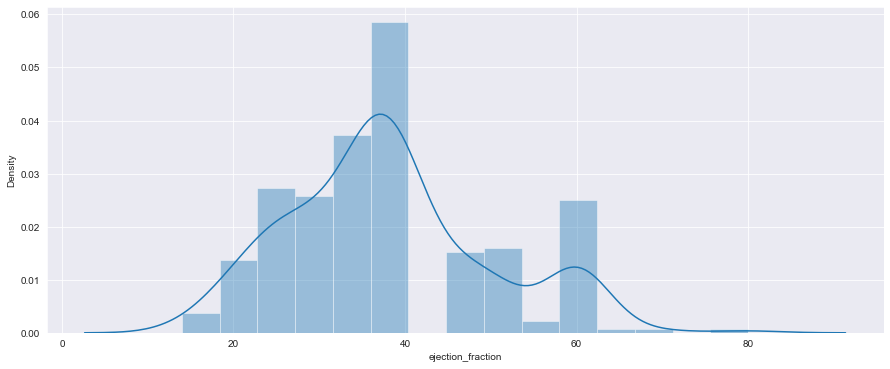

In [12]:
#Checking Data Distribution for Ejection Fraction
plt.figure(figsize=(15,6))
sns.distplot(df['ejection_fraction'])
plt.show()

Here ejection fraction seems like normally distributed

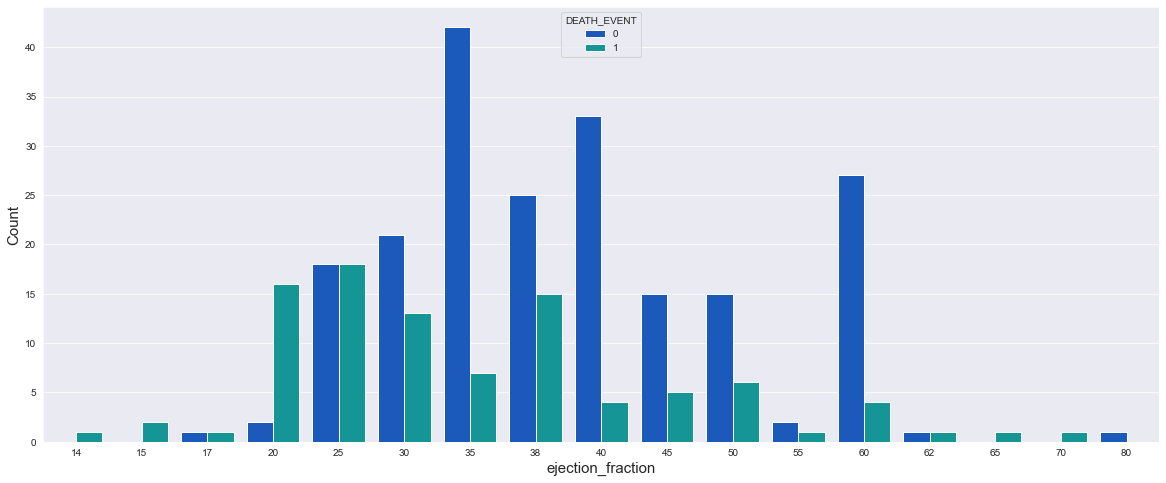

In [13]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.countplot(x='ejection_fraction', data=df, hue ='DEATH_EVENT', palette='winter')
plt.xlabel('ejection_fraction',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

The person who's ejection_fraction value 14,15,17,20,25,62,65,70 are died because of heart failure


# Effect of High blood pressure

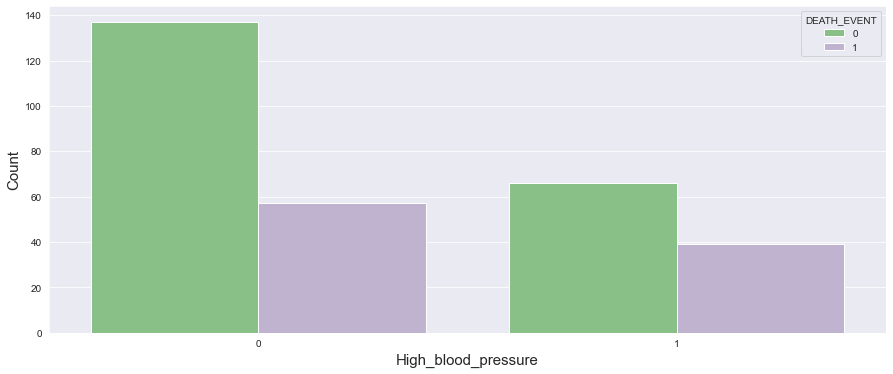

In [14]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.countplot(x='high_blood_pressure', data=df, hue ='DEATH_EVENT', palette='Accent')
plt.xlabel('High_blood_pressure',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Count Plot shows us the Death event for person having High blood pressure is more than the person have not high blood pressure

plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.countplot(x='sex', data=df, hue ='DEATH_EVENT', palette='Accent')
plt.xlabel('sex',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

# Effect of platelets

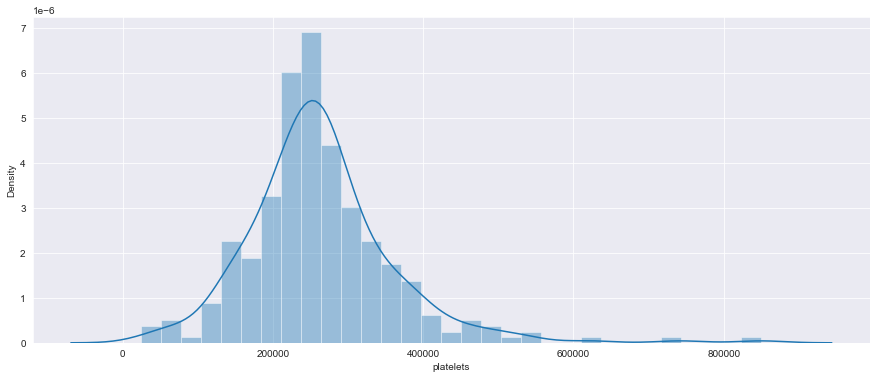

In [15]:
#Checking Data Distribution For platelets
plt.figure(figsize=(15,6))
sns.distplot(df['platelets'])
plt.show()

Displot shows platelets is normally distributed

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

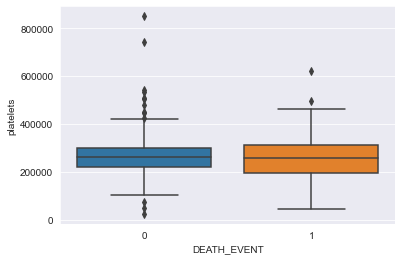

In [16]:
sns.boxplot(x='DEATH_EVENT',y='platelets',data=df)

The median platelets for death event is same

# Effect of smoking

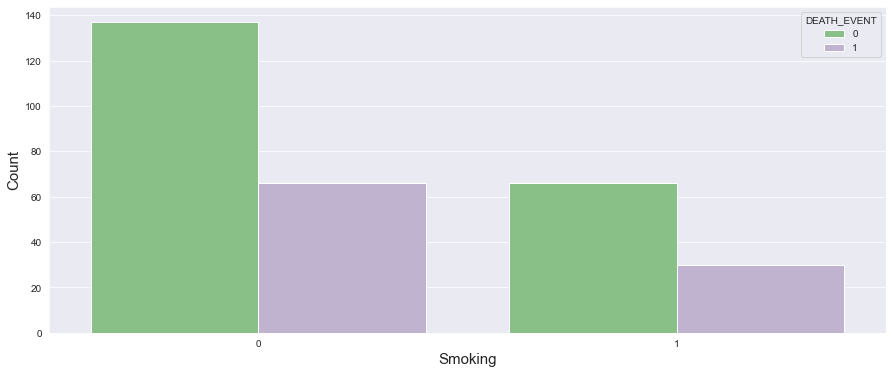

In [17]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.countplot(x='smoking', data=df, hue ='DEATH_EVENT', palette='Accent')
plt.xlabel('Smoking',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [18]:
df.groupby('smoking')['DEATH_EVENT'].value_counts()

smoking  DEATH_EVENT
0        0              137
         1               66
1        0               66
         1               30
Name: DEATH_EVENT, dtype: int64

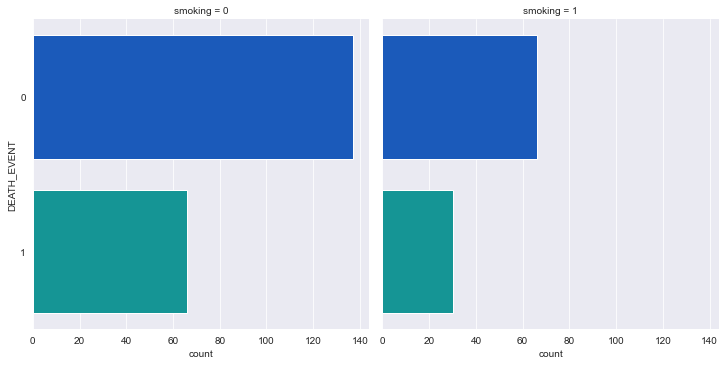

In [19]:
## We can visualize the value counts of the smoking variable wrt DEATH EVENT as follows -
sns.catplot(y="DEATH_EVENT", col="smoking", data=df, kind="count", height=5,  palette="winter")

The Above plot shows that.

1.Out of 137 not smoking person 66 died

2.Out of 66 smoking person 30 died

# Effect of Anaemia

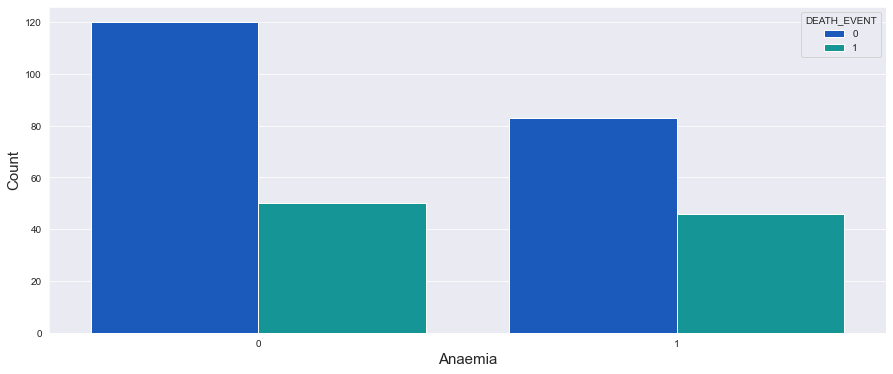

In [20]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.countplot(x='anaemia', data=df, hue ='DEATH_EVENT', palette='winter')
plt.xlabel('Anaemia',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [21]:
df.groupby('anaemia')['DEATH_EVENT'].value_counts()

anaemia  DEATH_EVENT
0        0              120
         1               50
1        0               83
         1               46
Name: DEATH_EVENT, dtype: int64

Above plot confirms that.

1.The total person having anaemia is 129 out of 46 are died

2.The person not having anaemia are 170 out of 50 died

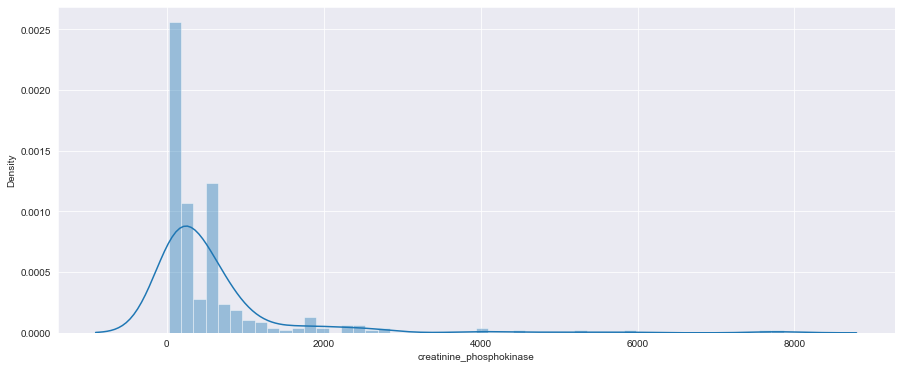

In [22]:
#Checking Data Distribution for creatinine phosphokinase
plt.figure(figsize=(15,6))
sns.distplot(df['creatinine_phosphokinase'])
plt.show()

The distribution of creatinine_phosphokinase is right skewed

# Effect of serum creatinine

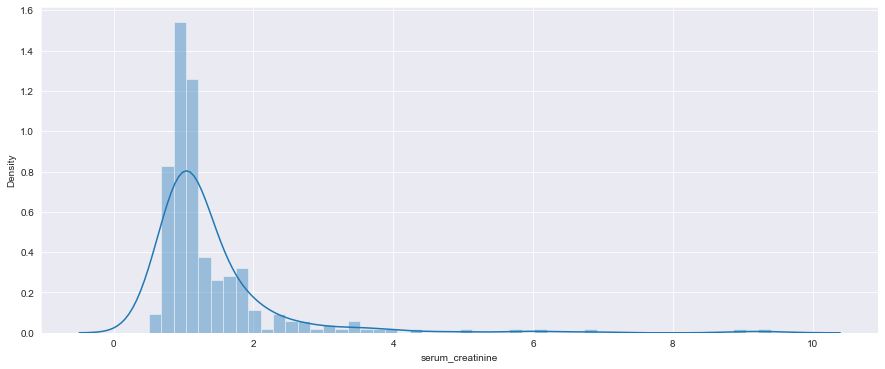

In [23]:
#Cheaking Data Distribution for serum creatinine
plt.figure(figsize=(15,6))
sns.distplot(df['serum_creatinine'])
plt.show()

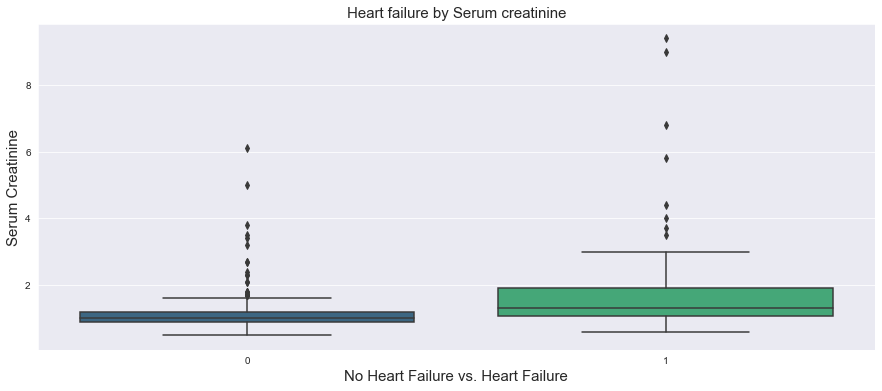

In [24]:
plt.figure(figsize=(15,6))
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',data=df,palette='viridis')
plt.title('Heart failure by Serum creatinine',size=15)
plt.xlabel('No Heart Failure vs. Heart Failure',size=15)
plt.ylabel('Serum Creatinine',size=15);

The median of No heart failure is less and for failure it is more

# Effect of serum sodium

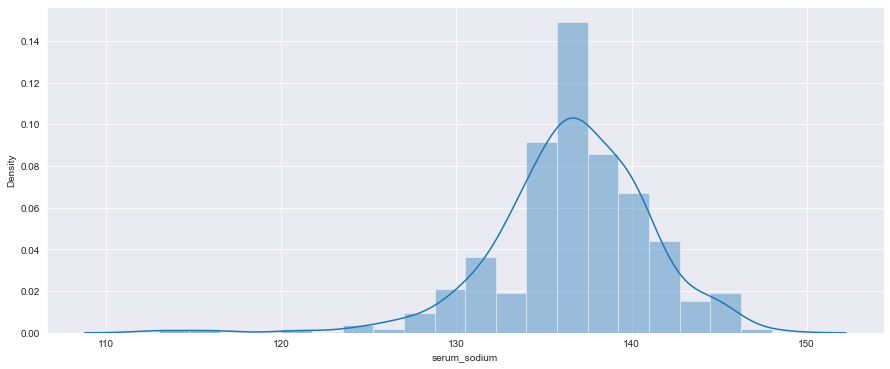

In [25]:
#Data Distribution For serum sodium
plt.figure(figsize=(15,6))
sns.distplot(df['serum_sodium'])
plt.show()

Serum sodium is normally distributed

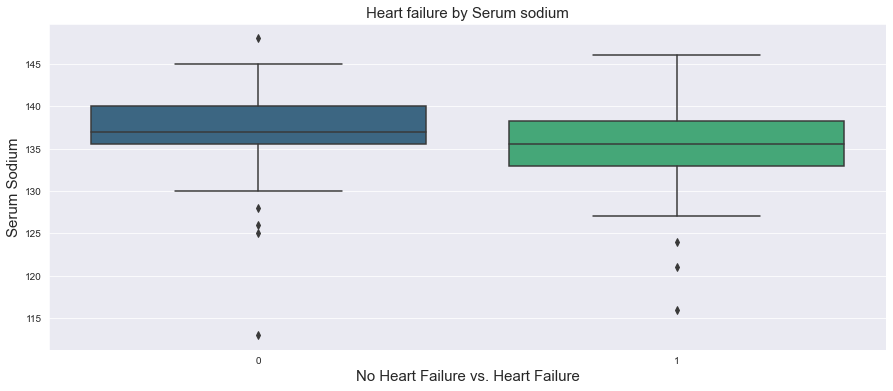

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x='DEATH_EVENT',y='serum_sodium',data=df,palette='viridis')
plt.title('Heart failure by Serum sodium',size=15)
plt.xlabel('No Heart Failure vs. Heart Failure',size=15)
plt.ylabel('Serum Sodium',size=15);

We can see that those people died by heart failure have relatively lower serum sodium as compared to people who are not died by heart failure.

In [27]:
df.groupby('sex')['DEATH_EVENT'].value_counts()

sex  DEATH_EVENT
0    0               71
     1               34
1    0              132
     1               62
Name: DEATH_EVENT, dtype: int64

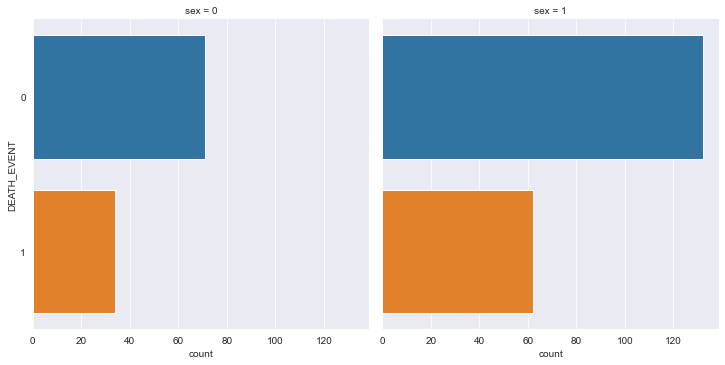

In [28]:
sns.catplot(y="DEATH_EVENT", col="sex", data=df, kind="count", height=5,  palette="tab10")

The above plot shows that.

1.Out of 105 females 34 died beacause of heart failure

2.Out of 194 males 62 died beacause of heart failure

# Effect of Follow up period

Text(0, 0.5, 'time')

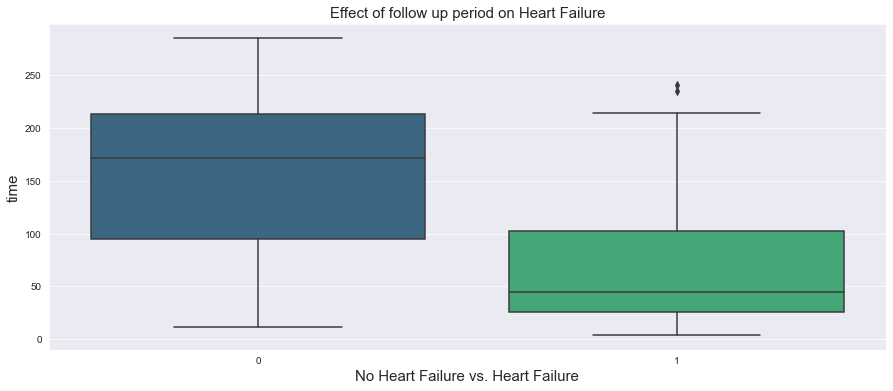

In [29]:
plt.figure(figsize=(15,6))
sns.boxplot(x='DEATH_EVENT',y='time',data=df,palette='viridis')
plt.title('Effect of follow up period on Heart Failure',size=15)
plt.xlabel('No Heart Failure vs. Heart Failure',size=15)
plt.ylabel('time',size=15)

The above Box plot shows us the person who's follow up period more is not died and the person who's follow up period less is died by Heart Failure

In [30]:
#Converting dataset into dependent and independent
X = df.iloc[:,0:12]
y = df.iloc[:,-1]

# Handling Imbalanced Dataset

In [31]:
from imblearn.combine import SMOTETomek
st = SMOTETomek()
X_res,y_res=st.fit_resample(X,y)

In [32]:
X_res.shape

(332, 12)

In [33]:
y_res.value_counts()

0    166
1    166
Name: DEATH_EVENT, dtype: int64

So now dataset is balanced

# Feature Selection

In [34]:
from sklearn.feature_selection import SelectKBest,chi2

In [35]:
features = SelectKBest(score_func=chi2,k=10)
fit = features.fit(X,y)

In [36]:
dfscore = pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(X.columns)

In [37]:
bestfeature = pd.concat([dfcol,dfscore],axis=1)
bestfeature.columns=['column','score']

In [38]:
bestfeature

,column,score
0,age,44.619455
1,anaemia,0.746593
2,creatinine_phosphokinase,1897.314839
3,diabetes,0.000657
4,ejection_fraction,79.072541
5,high_blood_pressure,1.221539
6,platelets,26135.771990
7,serum_creatinine,19.814118
8,serum_sodium,1.618175
9,sex,0.001956


In [39]:
print(bestfeature.nlargest(8,'score'))

                      column         score
6                  platelets  26135.771990
11                      time   3826.892661
2   creatinine_phosphokinase   1897.314839
4          ejection_fraction     79.072541
0                        age     44.619455
7           serum_creatinine     19.814118
8               serum_sodium      1.618175
5        high_blood_pressure      1.221539


So these are the most important 8 features. by using these features we build a model

In [40]:
#Drop Sex and Diabetes because both features gives very less contribution in Death event
final_features = df.drop(df[['sex','diabetes','anaemia','smoking']],axis=1)

In [41]:
final_features.head()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,582,20,1,265000.00,1.9,130,4,1
1,55.0,7861,38,0,263358.03,1.1,136,6,1
2,65.0,146,20,0,162000.00,1.3,129,7,1
3,50.0,111,20,0,210000.00,1.9,137,7,1
4,65.0,160,20,0,327000.00,2.7,116,8,1


In [42]:
#Dividin Data into denpendent and independent variables
X_new = final_features.iloc[:,0:8]
y_new = final_features.iloc[:,-1]

# Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=40)

# Model Building

# 1. Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators=10,random_state=0)

In [45]:
ran.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [46]:
ran.score(X_test,y_test)

0.9

In [47]:
ran.score(X_train,y_train)

0.99581589958159

In [48]:
y_pred = ran.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
cd = confusion_matrix(y_pred,y_test)

<AxesSubplot:>

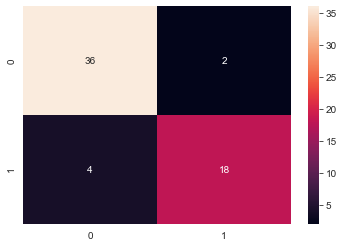

In [50]:
sns.heatmap(cd,annot=True)

# 2. Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
pred= dtree.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [55]:
cd1=confusion_matrix(pred,y_test)

<AxesSubplot:>

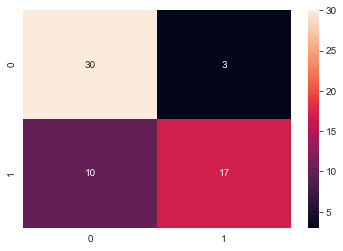

In [56]:
sns.heatmap(cd1,annot=True)

# 3.Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [58]:
lg.fit(X_train,y_train)

LogisticRegression()

In [59]:
lg.score(X_test,y_test)

0.8333333333333334

In [60]:
y_pred = lg.predict(X_test)

In [61]:
cd2 = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

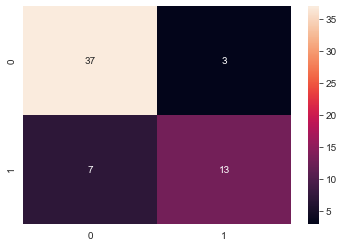

In [62]:
sns.heatmap(cd2,annot=True)

# 4.Knn

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [64]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
knn.score(X_test,y_test)

0.6333333333333333

In [66]:
for i in range(1,15):
    print('k=',i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print(knn.score(X_test,y_test))
    print('\n')
    

k= 1
0.5833333333333334


k= 2
0.6666666666666666


k= 3
0.5666666666666667


k= 4
0.65


k= 5
0.6333333333333333


k= 6
0.6333333333333333


k= 7
0.6666666666666666


k= 8
0.6666666666666666


k= 9
0.65


k= 10
0.6333333333333333


k= 11
0.65


k= 12
0.65


k= 13
0.6666666666666666


k= 14
0.6833333333333333




At k=14 gives highest accuracy

In [67]:
y_pred = knn.predict(X_test)

In [68]:
cd3 = confusion_matrix(y_pred,y_test)

<AxesSubplot:>

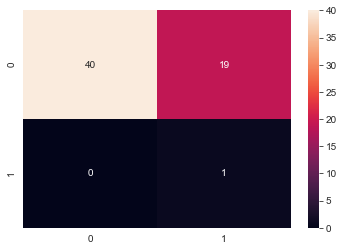

In [69]:
sns.heatmap(cd3,annot=True)

# 5.AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()

In [71]:
ad.fit(X_train,y_train)

AdaBoostClassifier()

In [72]:
ad.score(X_test,y_test)

0.8

In [73]:
y_pred = ad.predict(X_test)

In [74]:
cd4 = confusion_matrix(y_pred,y_test)

<AxesSubplot:>

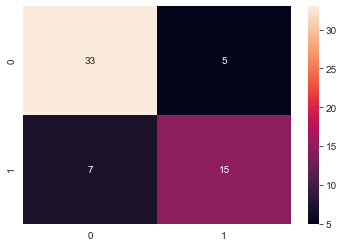

In [75]:
sns.heatmap(cd4,annot=True)

# Conclusion:

Out of these 5 models we choose Random Forest with 90% accuracy

# Save Model

In [76]:
import pickle

In [77]:
#open file where we want to store a data
file = open('heart_failure.pkl','wb')

#dump information in that file
pickle.dump(ran,file)